In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display
%matplotlib inline

In [5]:
import featuretools as ft


In [6]:
data = ft.demo.load_mock_customer()


In [9]:
customers_df = data["customers"]
customers_df

,customer_id,zip_code,join_date,date_of_birth
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [10]:
sessions_df = data["sessions"]
sessions_df.sample(5)

,session_id,customer_id,device,session_start
13,14,1,tablet,2014-01-01 03:28:00
6,7,3,tablet,2014-01-01 01:39:40
1,2,5,mobile,2014-01-01 00:17:20
28,29,1,mobile,2014-01-01 07:10:05
24,25,3,desktop,2014-01-01 05:59:40


In [11]:
In [7]: transactions_df = data["transactions"]

In [8]: transactions_df.sample(5)

,transaction_id,session_id,transaction_time,product_id,amount
74,232,5,2014-01-01 01:20:10,1,139.20
231,27,17,2014-01-01 04:10:15,2,90.79
434,36,31,2014-01-01 07:50:10,3,62.35
420,56,30,2014-01-01 07:35:00,3,72.70
54,444,4,2014-01-01 00:58:30,4,43.59


In [14]:
entities = {
            "customers" : (customers_df, "customer_id"),
            "sessions" : (sessions_df, "session_id", "session_start"),
            "transactions" : (transactions_df, "transaction_id", "transaction_time")
}

In [15]:
entities

{'customers': (   customer_id zip_code           join_date date_of_birth
  0            1    60091 2011-04-17 10:48:33    1994-07-18
  1            2    13244 2012-04-15 23:31:04    1986-08-18
  2            3    13244 2011-08-13 15:42:34    2003-11-21
  3            4    60091 2011-04-08 20:08:14    2006-08-15
  4            5    60091 2010-07-17 05:27:50    1984-07-28,
  'customer_id'),
 'sessions': (    session_id  customer_id   device       session_start
  0            1            2  desktop 2014-01-01 00:00:00
  1            2            5   mobile 2014-01-01 00:17:20
  2            3            4   mobile 2014-01-01 00:28:10
  3            4            1   mobile 2014-01-01 00:44:25
  4            5            4   mobile 2014-01-01 01:11:30
  5            6            1   tablet 2014-01-01 01:23:25
  6            7            3   tablet 2014-01-01 01:39:40
  7            8            4   tablet 2014-01-01 01:55:55
  8            9            1  desktop 2014-01-01 02:15:25
  9   

In [16]:
relationships = [("sessions", "session_id", "transactions", "session_id"),
   ....:                  ("customers", "customer_id", "sessions", "customer_id")]
   ....: 

In [17]:
feature_matrix_customers, features_defs = ft.dfs(entities=entities,
   ....:                                                  relationships=relationships,
   ....:                                                  target_entity="customers")

In [18]:
feature_matrix_customers

,zip_code,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),...,SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.customer_id),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.customer_id),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
1,60091,8,mobile,3,126,139.43,71.631905,5.81,4,5,...,1057.97,582.193117,78.59,40,-0.476122,312.745952,1,mobile,1,3
2,13244,7,desktop,3,93,146.81,77.422366,8.73,4,5,...,931.63,548.905851,154.60,35,-0.277640,258.700528,2,desktop,1,3
3,13244,6,desktop,3,93,149.15,67.060430,5.89,1,5,...,847.63,405.237462,66.21,29,2.286086,257.299895,3,desktop,1,3
4,60091,8,mobile,3,109,149.95,80.070459,5.73,2,5,...,1157.99,649.657515,131.51,37,0.002764,356.125829,4,mobile,1,3
5,60091,6,mobile,3,79,149.02,80.375443,7.55,5,5,...,839.76,472.231119,86.49,30,0.014384,259.873954,5,mobile,1,3


In [19]:
features_defs

[<Feature: zip_code>,
 <Feature: COUNT(sessions)>,
 <Feature: MODE(sessions.device)>,
 <Feature: NUM_UNIQUE(sessions.device)>,
 <Feature: COUNT(transactions)>,
 <Feature: MAX(transactions.amount)>,
 <Feature: MEAN(transactions.amount)>,
 <Feature: MIN(transactions.amount)>,
 <Feature: MODE(transactions.product_id)>,
 <Feature: NUM_UNIQUE(transactions.product_id)>,
 <Feature: SKEW(transactions.amount)>,
 <Feature: STD(transactions.amount)>,
 <Feature: SUM(transactions.amount)>,
 <Feature: DAY(date_of_birth)>,
 <Feature: DAY(join_date)>,
 <Feature: MONTH(date_of_birth)>,
 <Feature: MONTH(join_date)>,
 <Feature: WEEKDAY(date_of_birth)>,
 <Feature: WEEKDAY(join_date)>,
 <Feature: YEAR(date_of_birth)>,
 <Feature: YEAR(join_date)>,
 <Feature: MAX(sessions.COUNT(transactions))>,
 <Feature: MAX(sessions.MEAN(transactions.amount))>,
 <Feature: MAX(sessions.MIN(transactions.amount))>,
 <Feature: MAX(sessions.NUM_UNIQUE(transactions.product_id))>,
 <Feature: MAX(sessions.SKEW(transactions.amount)

In [20]:
feature_matrix_sessions, features_defs = ft.dfs(entities=entities,
   ....:                                                 relationships=relationships,
   ....:                                                 target_entity="sessions")

In [22]:
feature_matrix_sessions.head(15)

,customer_id,device,COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),STD(transactions.amount),...,customers.STD(transactions.amount),customers.SUM(transactions.amount),customers.DAY(date_of_birth),customers.DAY(join_date),customers.MONTH(date_of_birth),customers.MONTH(join_date),customers.WEEKDAY(date_of_birth),customers.WEEKDAY(join_date),customers.YEAR(date_of_birth),customers.YEAR(join_date)
session_id,,,,,,,,,,,,,,,,,,,,,
1,2,desktop,16,141.66,76.813125,20.91,3,5,0.295458,41.600976,...,37.705178,7200.28,18,15,8,4,0,6,1986,2012
2,5,mobile,10,135.25,74.696000,9.32,5,5,-0.160550,45.893591,...,44.095630,6349.66,28,17,7,7,5,5,1984,2010
3,4,mobile,15,147.73,88.600000,8.70,1,5,-0.324012,46.240016,...,45.068765,8727.68,15,8,8,4,1,4,2006,2011
4,1,mobile,25,129.00,64.557200,6.29,5,5,0.234349,40.187205,...,40.442059,9025.62,18,17,7,4,0,6,1994,2011
5,4,mobile,11,139.20,70.638182,7.43,5,5,0.336381,48.918663,...,45.068765,8727.68,15,8,8,4,1,4,2006,2011
6,1,tablet,15,139.23,84.440000,8.74,4,5,-0.134754,42.654755,...,40.442059,9025.62,18,17,7,4,0,6,1994,2011
7,3,tablet,15,146.31,62.791333,8.19,1,5,0.618455,47.264797,...,43.683296,6236.62,21,13,11,8,4,5,2003,2011
8,4,tablet,18,143.85,75.081111,12.59,1,5,0.200676,44.213242,...,45.068765,8727.68,15,8,8,4,1,4,2006,2011
9,1,desktop,15,132.72,70.135333,5.81,1,5,0.226337,46.905665,...,40.442059,9025.62,18,17,7,4,0,6,1994,2011


In [31]:
feature_matrix_sessions['MODE(transactions.WEEKDAY(transaction_time))']

session_id
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    2
35    2
Name: MODE(transactions.WEEKDAY(transaction_time)), dtype: int64

In [23]:
features_defs

[<Feature: customer_id>,
 <Feature: device>,
 <Feature: COUNT(transactions)>,
 <Feature: MAX(transactions.amount)>,
 <Feature: MEAN(transactions.amount)>,
 <Feature: MIN(transactions.amount)>,
 <Feature: MODE(transactions.product_id)>,
 <Feature: NUM_UNIQUE(transactions.product_id)>,
 <Feature: SKEW(transactions.amount)>,
 <Feature: STD(transactions.amount)>,
 <Feature: SUM(transactions.amount)>,
 <Feature: DAY(session_start)>,
 <Feature: MONTH(session_start)>,
 <Feature: WEEKDAY(session_start)>,
 <Feature: YEAR(session_start)>,
 <Feature: customers.zip_code>,
 <Feature: MODE(transactions.DAY(transaction_time))>,
 <Feature: MODE(transactions.MONTH(transaction_time))>,
 <Feature: MODE(transactions.WEEKDAY(transaction_time))>,
 <Feature: MODE(transactions.YEAR(transaction_time))>,
 <Feature: NUM_UNIQUE(transactions.DAY(transaction_time))>,
 <Feature: NUM_UNIQUE(transactions.MONTH(transaction_time))>,
 <Feature: NUM_UNIQUE(transactions.WEEKDAY(transaction_time))>,
 <Feature: NUM_UNIQUE(tr

In [24]:
feature = features_defs[18]

feature

<Feature: MODE(transactions.WEEKDAY(transaction_time))>

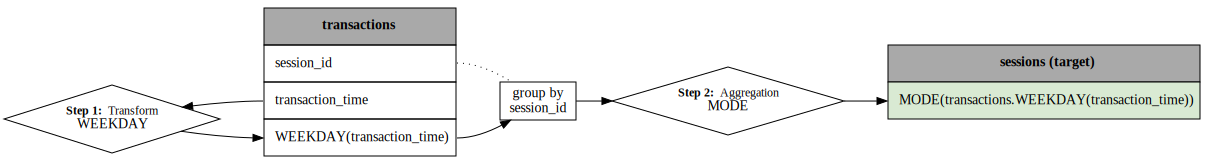

In [26]:
ft.graph_feature(feature)

In [32]:
ft.describe_feature(feature)

'The most frequently occurring value of the day of the week of the "transaction_time" of all instances of "transactions" for each "session_id" in "sessions".'